In [46]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [47]:
df = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Final_Loans_dataset.csv")
df

C:\Users\Amani\AppData\Local\Temp\ipykernel_22084\1252562441.py:1: DtypeWarning: Columns (1,2,4,5,6,8,9,10,13,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Final_Loans_dataset.csv")


,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
0,209801.0,FEMALE,37,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,II,B10,KES,5000.00,642000.00,"59,826.37",204.0,DOUBTFUL,B9,"453,208.12",CURRENT
1,315048.0,MALE,41,3.0,SELF-EMPLOYED,NaN,MARRIED,529.0,JJ,B20,KES,0.00,78000.00,"6,149.03",295.0,DOUBTFUL,B9,"68,917.29",EXPIRED
2,145878.0,MALE,36,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,FF,A5,KES,1294783.78,80000.00,"7,439.02",0.0,NORMAL,A1-A6,4.84,CURRENT
3,295535.0,MALE,41,5.0,EMPLOYED,NaN,0,618.0,HH,B20,KES,347554.00,172000.00,"16,062.90",323.0,DOUBTFUL,B9,"195,045.53",EXPIRED
4,493960.0,MALE,41,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,DD,A5,KES,4210957.00,300502.44,"28,098.61",0.0,NORMAL,A1-A6,247.18,CURRENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 1048575


In [49]:
df.isna().sum()

ID                           1030378
GENDER                       1030826
AGE                             3455
NO_DEFAULT_LOAN              1030653
EMPLOYMENT_STATUS            1030378
SECTOR                       1030505
MARITAL_STATUS               1030378
CREDIT_SCORE                 1030653
SCOREGRADE                   1030653
CRR                          1030378
CURRENCY                     1030378
NET INCOME                   1030812
PRINCIPAL_AMOUNT             1030378
EMI                          1030378
OD_DAYS                      1030378
PRUDENTIAL_CLASSIFICATION    1030378
RISK_GRADE                   1030378
AREARS                       1030378
LOAN_STATUS                  1030378
dtype: int64

as shown above there are alot of empty rows.

In [50]:
df.tail(1030380)

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
18195,100763.0,FEMALE,30,0.0,SELF-EMPLOYED,BUILDING & CONSTRUCTION,SINGLE,694.0,DD,A5,KES,261190.00,5000.0,"1,721.71",0.0,NORMAL,A1-A6,0,CURRENT
18196,173465.0,FEMALE,36,1.0,0,INDIVIDUALS,0,721.0,CC,A5,KES,1927414.96,110000.0,"19,395.60",0.0,NORMAL,A1-A6,0,CURRENT
18197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are NAN rows after the first 18,196 rows.

In [51]:
# Keep only the first 18,196 rows
df_cleaned = df.head(18196)

# Check the shape of the cleaned dataset
print("Rows after cleaning:", df_cleaned.shape[0])
#df_cleaned.to_csv(r"C:\Users\Betty.Koila\Desktop\DataScience\DSC-CapstoneProject\Data\Cleaned_dataset.csv", index=False)


Rows after cleaning: 18196


In [52]:
df_cleaned.isna().sum()

ID                             0
GENDER                       448
AGE                            0
NO_DEFAULT_LOAN              275
EMPLOYMENT_STATUS              0
SECTOR                       127
MARITAL_STATUS                 0
CREDIT_SCORE                 275
SCOREGRADE                   275
CRR                            0
CURRENCY                       0
NET INCOME                   434
PRINCIPAL_AMOUNT               0
EMI                            0
OD_DAYS                        0
PRUDENTIAL_CLASSIFICATION      0
RISK_GRADE                     0
AREARS                         0
LOAN_STATUS                    0
dtype: int64

In [53]:
df_1 = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Cleaned_dataset.csv")
df_1.head(5)

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
0,209801.0,FEMALE,37,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,II,B10,KES,5000.00,642000.00,"59,826.37",204.0,DOUBTFUL,B9,"453,208.12",CURRENT
1,315048.0,MALE,41,3.0,SELF-EMPLOYED,NaN,MARRIED,529.0,JJ,B20,KES,0.00,78000.00,"6,149.03",295.0,DOUBTFUL,B9,"68,917.29",EXPIRED
2,145878.0,MALE,36,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,FF,A5,KES,1294783.78,80000.00,"7,439.02",0.0,NORMAL,A1-A6,4.84,CURRENT
3,295535.0,MALE,41,5.0,EMPLOYED,NaN,0,618.0,HH,B20,KES,347554.00,172000.00,"16,062.90",323.0,DOUBTFUL,B9,"195,045.53",EXPIRED
4,493960.0,MALE,41,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,DD,A5,KES,4210957.00,300502.44,"28,098.61",0.0,NORMAL,A1-A6,247.18,CURRENT


In [54]:
df_1.tail()

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
18191,194938.0,FEMALE,37,0.0,EMPLOYED,INDIVIDUALS,0,757.0,AA,A3,KES,674717.91,60000.0,"5,545.94",0.0,NORMAL,A1-A6,0,CURRENT
18192,128816.0,FEMALE,25,1.0,SELF-EMPLOYED,MANUFACTURING & PROCESSING,SINGLE,585.0,II,A5,KES,299212.00,5000.0,"1,721.71",0.0,NORMAL,A1-A6,0,CURRENT
18193,320610.0,FEMALE,38,1.0,EMPLOYED,MANUFACTURING & PROCESSING,MARRIED,704.0,DD,A5,KES,320832.00,8000.0,"2,754.73",0.0,NORMAL,A1-A6,0,CURRENT
18194,252431.0,FEMALE,29,2.0,EMPLOYED,NON PROFIT INSTITUTIONS,MARRIED,607.0,II,A5,KES,693087.00,13000.0,"4,476.44",0.0,NORMAL,A1-A6,0,CURRENT
18195,100763.0,FEMALE,30,0.0,SELF-EMPLOYED,BUILDING & CONSTRUCTION,SINGLE,694.0,DD,A5,KES,261190.00,5000.0,"1,721.71",0.0,NORMAL,A1-A6,0,CURRENT


In [55]:
df_1.shape

(18196, 19)

In [56]:
# Show the data types of all columns
df_1.dtypes 

ID                           float64
GENDER                        object
AGE                           object
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object

Looking at the column data types, it seems that there are several columns with mixed data types. Specifically:

AGE, PRINCIPAL_AMOUNT, EMI, AREARS are of type object, but they seem like they should be numeric (such as integer or float).

CRR, SCOREGRADE, MARITAL_STATUS, SECTOR, EMPLOYMENT_STATUS, and RISK_GRADE are object type, which seems appropriate for categorical variables.

NO_DEFAULT_LOAN, CREDIT_SCORE, NET_INCOME, OD_DAYS are float64, which seems correct for numeric columns.

Steps to address the mixed data types and clean the dataset:

1. Fix the AGE, PRINCIPAL_AMOUNT, EMI, and AREARS Columns:
These columns should likely be numeric. Some entries might have non-numeric values (such as strings, missing values, or special characters), which causes pandas to infer the column as object. You can clean and convert them to numeric data types.

You can try the following code to convert these columns:

The errors='coerce' argument will turn any invalid values (like strings or symbols) into NaN values.

2. Handle Missing Values (NaN):
After converting, you will likely have NaN values in the columns where there were non-numeric values. You can decide how to handle these NaN values:

Fill with a placeholder value (e.g., 0 or the column mean).
Drop rows with NaN values in those columns.
Example to fill NaN with the mean of the column:

3. Inspect and Clean Categorical Columns:
Ensure that categorical columns such as GENDER, MARITAL_STATUS, SECTOR, etc., do not contain any unexpected characters or missing values. If needed, you can clean these columns by standardizing the values or converting them into appropriate categories.

For example, for the GENDER column:

This code strips extra spaces and replaces shorthand values (M and F) with full values (Male, Female).

4. Double-check Data Types:
After cleaning, you can verify the data types to make sure the columns are in the expected format:


In [57]:
# Use .loc to ensure you are modifying the original DataFrame
df_1.loc[:, 'AGE'] = pd.to_numeric(df_1['AGE'], errors='coerce')
df_1.loc[:, 'PRINCIPAL_AMOUNT'] = pd.to_numeric(df_1['PRINCIPAL_AMOUNT'], errors='coerce')

In [58]:
df_1.dtypes 

ID                           float64
GENDER                        object
AGE                           object
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object

In [59]:
df_1.isna().sum()

ID                             0
GENDER                       448
AGE                           87
NO_DEFAULT_LOAN              275
EMPLOYMENT_STATUS              0
SECTOR                       127
MARITAL_STATUS                 0
CREDIT_SCORE                 275
SCOREGRADE                   275
CRR                            0
CURRENCY                       0
NET INCOME                   434
PRINCIPAL_AMOUNT               0
EMI                            0
OD_DAYS                        0
PRUDENTIAL_CLASSIFICATION      0
RISK_GRADE                     0
AREARS                         0
LOAN_STATUS                    0
dtype: int64

In [60]:
print(df_1["EMI"])

0        59,826.37
1         6,149.03
2         7,439.02
3        16,062.90
4        28,098.61
           ...    
18191     5,545.94
18192     1,721.71
18193     2,754.73
18194     4,476.44
18195     1,721.71
Name: EMI, Length: 18196, dtype: object


In [61]:
print(df_1["AREARS"])

0        453,208.12
1         68,917.29
2              4.84
3        195,045.53
4            247.18
            ...    
18191             0
18192             0
18193             0
18194             0
18195             0
Name: AREARS, Length: 18196, dtype: object


In [62]:
df_1["EMI"] = df_1["EMI"].str.replace(",", "").astype(float)
df_1["AREARS"] = df_1["AREARS"].str.replace(",", "").astype(float)

In [63]:
print(df_1["EMI"])

0        59826.37
1         6149.03
2         7439.02
3        16062.90
4        28098.61
           ...   
18191     5545.94
18192     1721.71
18193     2754.73
18194     4476.44
18195     1721.71
Name: EMI, Length: 18196, dtype: float64


In [64]:
print(df_1["AREARS"])

0        453208.12
1         68917.29
2             4.84
3        195045.53
4           247.18
           ...    
18191         0.00
18192         0.00
18193         0.00
18194         0.00
18195         0.00
Name: AREARS, Length: 18196, dtype: float64


Dropped NAN for the CREDIT_SCORE,NET INCOME,GENDER as filling them would have misrepresented the data.Dropped SECTOR because its was an absolute number.

In [65]:
df_1= df_1.dropna(subset=["CREDIT_SCORE"])
df_1= df_1.dropna(subset=["NET INCOME"])
df_1= df_1.dropna(subset=["GENDER"])
df_1= df_1.dropna(subset=["SECTOR"])


In [66]:
df_1.isna().sum()

ID                            0
GENDER                        0
AGE                          40
NO_DEFAULT_LOAN               0
EMPLOYMENT_STATUS             0
SECTOR                        0
MARITAL_STATUS                0
CREDIT_SCORE                  0
SCOREGRADE                    0
CRR                           0
CURRENCY                      0
NET INCOME                    0
PRINCIPAL_AMOUNT              0
EMI                           0
OD_DAYS                       0
PRUDENTIAL_CLASSIFICATION     0
RISK_GRADE                    0
AREARS                        0
LOAN_STATUS                   0
dtype: int64

In [67]:

# Handle missing values by filling with column mean (or you could drop rows)
df_1['AGE'].fillna(df_1['AGE'].mean(), inplace=True)

# Finally, check the cleaned dataframe
print(df_1.head())


         ID  GENDER   AGE  NO_DEFAULT_LOAN EMPLOYMENT_STATUS  \
0  209801.0  FEMALE  37.0              7.0          EMPLOYED   
2  145878.0    MALE  36.0              6.0          EMPLOYED   
4  493960.0    MALE  41.0              1.0          EMPLOYED   
6  280570.0  FEMALE  38.0              0.0          EMPLOYED   
7   45325.0  FEMALE  32.0              0.0          EMPLOYED   

                                SECTOR MARITAL_STATUS  CREDIT_SCORE  \
0                  FINANCE & INSURANCE        MARRIED         615.0   
2            TRANSPORT & COMMUNICATION        MARRIED         665.0   
4                  FINANCE & INSURANCE         SINGLE         696.0   
6                  FINANCE & INSURANCE         SINGLE         632.0   
7  SOCIAL, COMMUNITY & PERSONAL SERVIC        MARRIED         622.0   

  SCOREGRADE  CRR CURRENCY  NET INCOME  PRINCIPAL_AMOUNT       EMI  OD_DAYS  \
0         II  B10      KES     5000.00         642000.00  59826.37    204.0   
2         FF   A5      KES  12

C:\Users\Amani\AppData\Local\Temp\ipykernel_22084\2986622001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['AGE'].fillna(df_1['AGE'].mean(), inplace=True)
C:\Users\Amani\AppData\Local\Temp\ipykernel_22084\2986622001.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['AGE'].fillna(df_1['AGE'].me

In [68]:
df_1.isna().sum()

ID                           0
GENDER                       0
AGE                          0
NO_DEFAULT_LOAN              0
EMPLOYMENT_STATUS            0
SECTOR                       0
MARITAL_STATUS               0
CREDIT_SCORE                 0
SCOREGRADE                   0
CRR                          0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_AMOUNT             0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
RISK_GRADE                   0
AREARS                       0
LOAN_STATUS                  0
dtype: int64

In [69]:
print(df_1.columns)

Index(['ID', 'GENDER', 'AGE', 'NO_DEFAULT_LOAN', 'EMPLOYMENT_STATUS', 'SECTOR',
       'MARITAL_STATUS', 'CREDIT_SCORE', 'SCOREGRADE', 'CRR', 'CURRENCY',
       'NET INCOME', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'RISK_GRADE', 'AREARS', 'LOAN_STATUS'],
      dtype='object')


We will drop the SCOREGRADE and RISK GRADE columns because they are very similar to the CREDIT SCORE and CRR columns and give the same information in another format

In [70]:
df_1_clean = df_1.drop(columns=['SCOREGRADE', 'RISK_GRADE'])
df_1_clean

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,AREARS,LOAN_STATUS
0,209801.0,FEMALE,37.0,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,B10,KES,5000.00,642000.00,59826.37,204.0,DOUBTFUL,453208.12,CURRENT
2,145878.0,MALE,36.0,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,A5,KES,1294783.78,80000.00,7439.02,0.0,NORMAL,4.84,CURRENT
4,493960.0,MALE,41.0,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,A5,KES,4210957.00,300502.44,28098.61,0.0,NORMAL,247.18,CURRENT
6,280570.0,FEMALE,38.0,0.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,632.0,B9,KES,44280.00,82000.72,6802.81,111.0,SUBSTANDARD,26582.90,CURRENT
7,45325.0,FEMALE,32.0,0.0,EMPLOYED,"SOCIAL, COMMUNITY & PERSONAL SERVIC",MARRIED,622.0,A5,KES,1000139.59,339584.95,15279.32,19.0,NORMAL,15519.98,CURRENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,194938.0,FEMALE,37.0,0.0,EMPLOYED,INDIVIDUALS,0,757.0,A3,KES,674717.91,60000.00,5545.94,0.0,NORMAL,0.00,CURRENT
18192,128816.0,FEMALE,25.0,1.0,SELF-EMPLOYED,MANUFACTURING & PROCESSING,SINGLE,585.0,A5,KES,299212.00,5000.00,1721.71,0.0,NORMAL,0.00,CURRENT
18193,320610.0,FEMALE,38.0,1.0,EMPLOYED,MANUFACTURING & PROCESSING,MARRIED,704.0,A5,KES,320832.00,8000.00,2754.73,0.0,NORMAL,0.00,CURRENT
18194,252431.0,FEMALE,29.0,2.0,EMPLOYED,NON PROFIT INSTITUTIONS,MARRIED,607.0,A5,KES,693087.00,13000.00,4476.44,0.0,NORMAL,0.00,CURRENT


In [71]:
#Checking for duplicates
print(df_1_clean.duplicated().sum())

0


In [72]:
#Value counts
# categorical columns
df_1_clean.select_dtypes(include='object').apply(lambda x: x.value_counts().sort_index())



,GENDER,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CRR,CURRENCY,PRUDENTIAL_CLASSIFICATION,LOAN_STATUS
0,5046.0,2039.0,NaN,3703.0,NaN,NaN,NaN,NaN
A2,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
A3,NaN,NaN,NaN,NaN,757.0,NaN,NaN,NaN
A4,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
A5,NaN,NaN,NaN,NaN,15831.0,NaN,NaN,NaN
A6,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN
AGRICULTURE,NaN,NaN,722.0,NaN,NaN,NaN,NaN,NaN
AUTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398.0
B10,NaN,NaN,NaN,NaN,253.0,NaN,NaN,NaN
B11,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN


In [86]:
#Replace te 0s with mode
# Define the columns to clean
columns_to_fix = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS']

for col in columns_to_fix:
    mode_value = df_1_clean[col].mode()[0]  # Get mode
    df_1_clean[col] = df_1_clean[col].replace('0', mode_value)  # Replace string '0'

print(df_1_clean[columns_to_fix].value_counts())



GENDER  EMPLOYMENT_STATUS  MARITAL_STATUS
FEMALE  EMPLOYED           MARRIED           4774
MALE    EMPLOYED           MARRIED           3029
FEMALE  SELF-EMPLOYED      MARRIED           2646
        EMPLOYED           SINGLE            2359
        SELF-EMPLOYED      SINGLE            1440
MALE    SELF-EMPLOYED      MARRIED           1128
        EMPLOYED           SINGLE             865
        SELF-EMPLOYED      SINGLE             473
FEMALE  EMPLOYED           OTHER              130
MALE    OTHER              MARRIED            104
FEMALE  OTHER              MARRIED             95
        SELF-EMPLOYED      OTHER               66
MALE    EMPLOYED           OTHER               43
FEMALE  OTHER              SINGLE              33
MALE    SELF-EMPLOYED      OTHER               26
FEMALE  SELF-EMPLOYED      WIDOWED             17
        STUDENT            SINGLE              17
        OTHER              OTHER               12
        EMPLOYED           WIDOWED             11
        

In [ ]:
# Looping through all categorical columns and print unique values
for col in columns_to_fix:
    print(f"Unique values in {col}: {df_1_clean[col].unique()}")


Unique values in GENDER: ['FEMALE' 'MALE']
Unique values in EMPLOYMENT_STATUS: ['EMPLOYED' 'SELF-EMPLOYED' 'OTHER' 'STUDENT' 'RETIRED' 'UNEMPLOYED']
Unique values in MARITAL_STATUS: ['MARRIED' 'SINGLE' 'OTHER' 'WIDOWED' 'DIVORCED' 'PARTNER' 'ENGAGED']


Checking for outliers

In [113]:
numeric_cols = df_1_clean.select_dtypes(include=['number']).columns
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count and return outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers[[column]]

# Loop through numeric columns and check for outliers
for col in numeric_cols:
    num_outliers, outliers_df = detect_outliers_iqr(df_1_clean, col)
    print(f"{col}: {num_outliers} outliers detected")


ID: 0 outliers detected
AGE: 265 outliers detected
NO_DEFAULT_LOAN: 394 outliers detected
CREDIT_SCORE: 36 outliers detected
NET INCOME: 1792 outliers detected
PRINCIPAL_AMOUNT: 1354 outliers detected
EMI: 791 outliers detected
OD_DAYS: 3093 outliers detected
AREARS: 3765 outliers detected


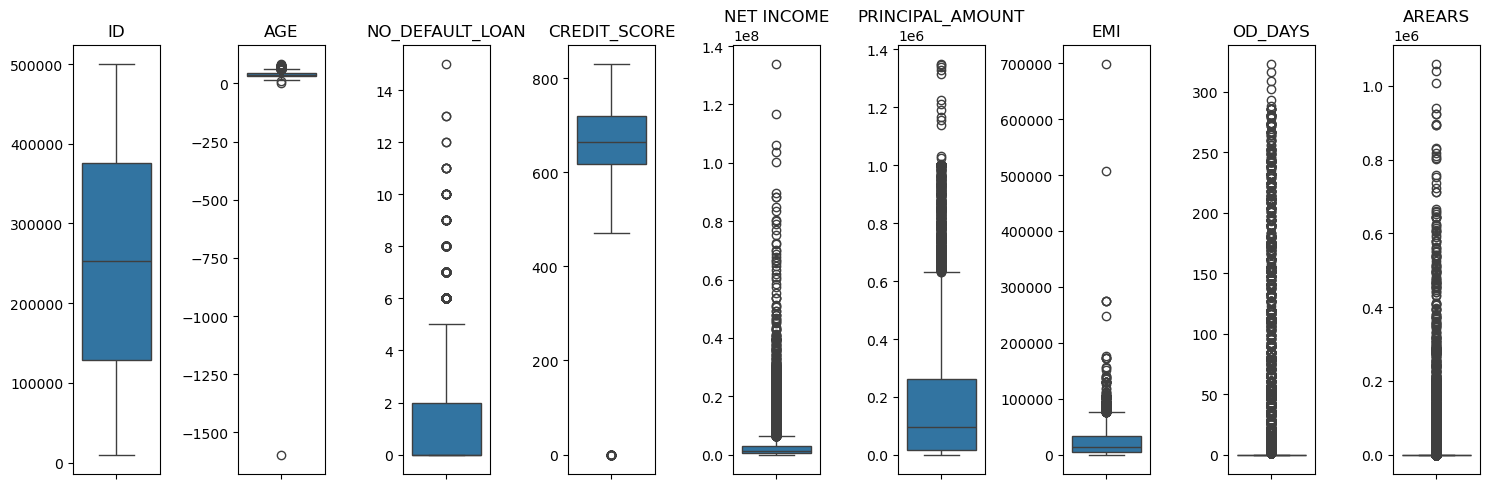

In [116]:
# Select only numeric columns
numeric_cols = df_1_clean.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_1_clean[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()


Eliminating outliers in AGE. CREDIT SCORE

In [117]:
# Funtion to remove using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to AGE and CREDIT_SCORE
df_1_clean = remove_outliers(df_1_clean, 'AGE')
df_1_clean = remove_outliers(df_1_clean, 'CREDIT_SCORE')

# Check new shape
print(df_1_clean.shape)


(17073, 17)


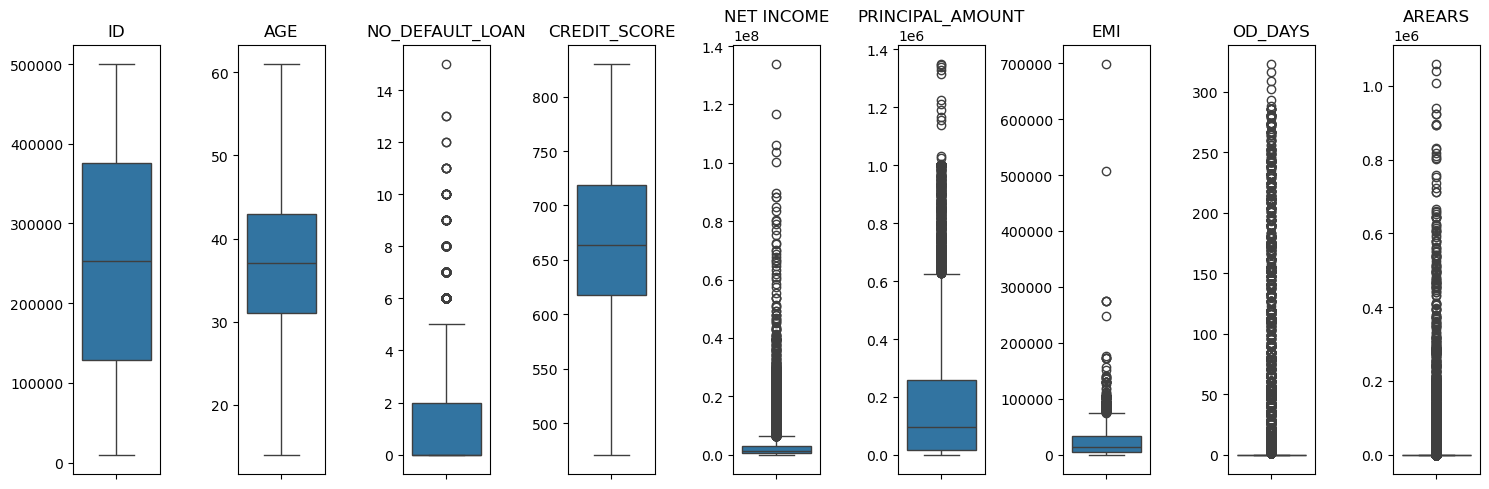

In [118]:
# Select only numeric columns
numeric_cols = df_1_clean.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_1_clean[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

Did EDA to see relationships between various columns:

1. The numeric columns. Age vs credit score, Age vs net income, Age vs no of defaulted loans
2. Important insights. Gender vs no of defaulted loans, gender vs credit score, gender vs loan status, gender vs CRR, Gender vs Net Income, Gender vs Loan Classification. Also age vs these same columns. 
3. Bar plots for categorical variables and histograms for numeric variables

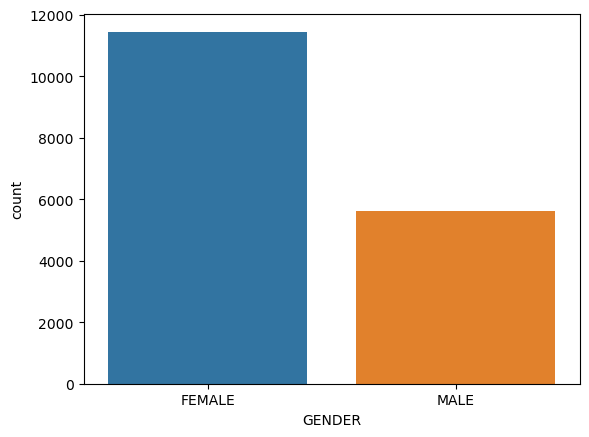

In [119]:
sns.countplot(x='GENDER', hue='GENDER', data=df_1_clean)
plt.show()


Distributions within categorical variables

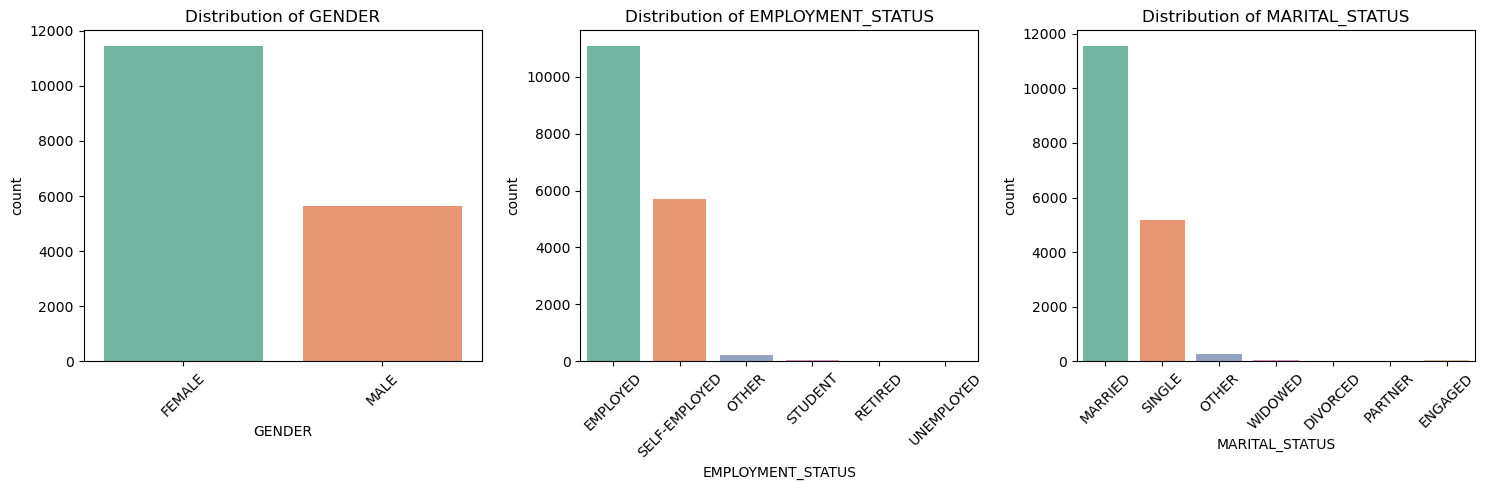

In [120]:
# Categorical columns
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS']  # Add more if needed

# Create subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))  # Adjust the layout

# Loop through categorical columns and plot each on a separate subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df_1_clean,hue=col, legend=False, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticks(range(len(df_1_clean[col].unique())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



Relationships between Age and other key variables

Correlation between Age, Credit Score and Number of Loans detaulted

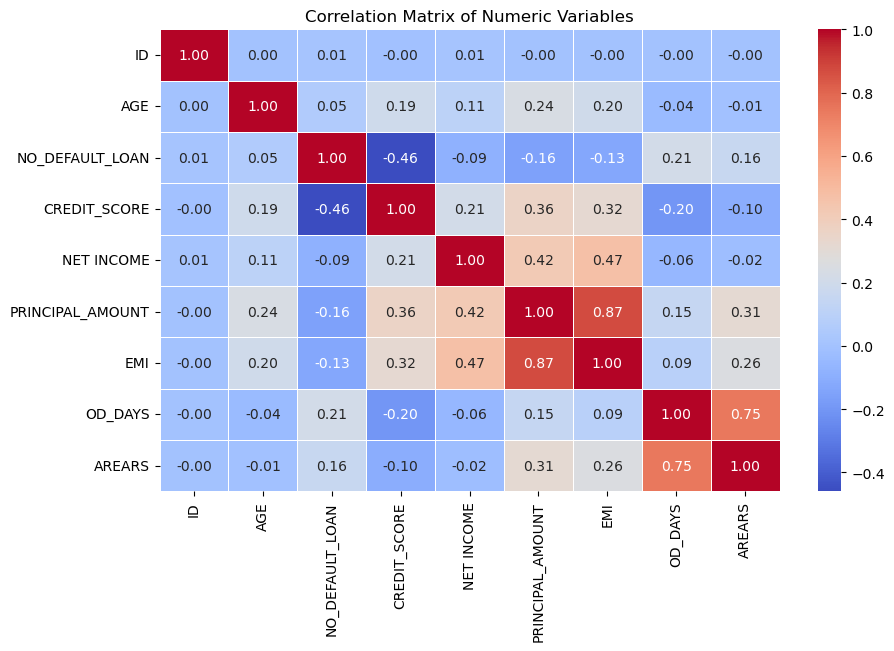

In [148]:
# Compute correlation matrix
numeric_df = df_1_clean.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

Credit Score across different loan statuses

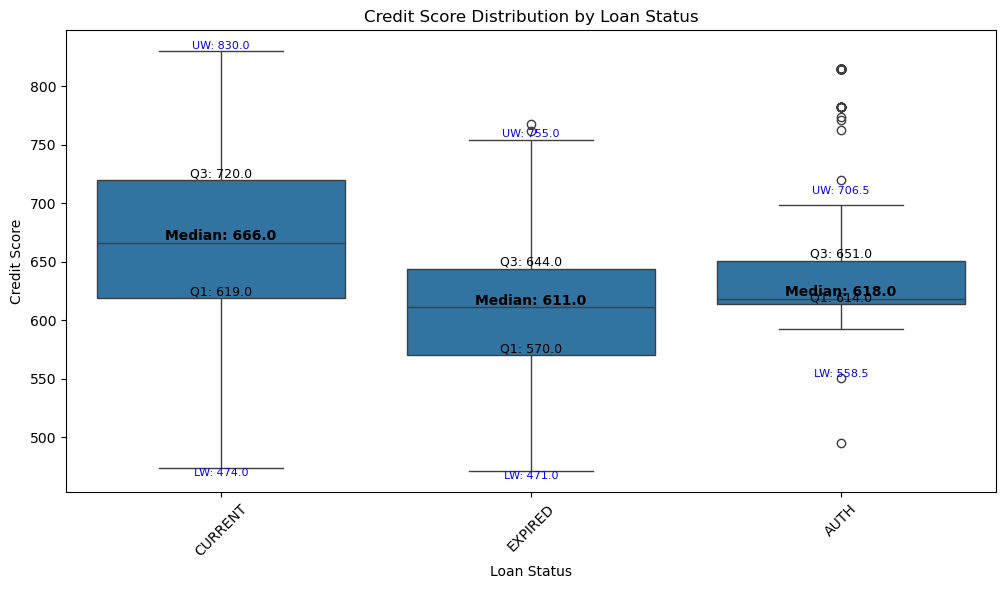

In [147]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='LOAN_STATUS', y='CREDIT_SCORE', data=df_1_clean)

# Loop through categories to annotate statistics
categories = df_1_clean['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Subset data
    subset = df_1_clean[df_1_clean['LOAN_STATUS'] == category]['CREDIT_SCORE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Credit Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.xticks(rotation=45)
plt.show()

Age across different prudential classifications.



C:\Users\Amani\AppData\Local\Temp\ipykernel_22084\4281772098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_1_clean, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')


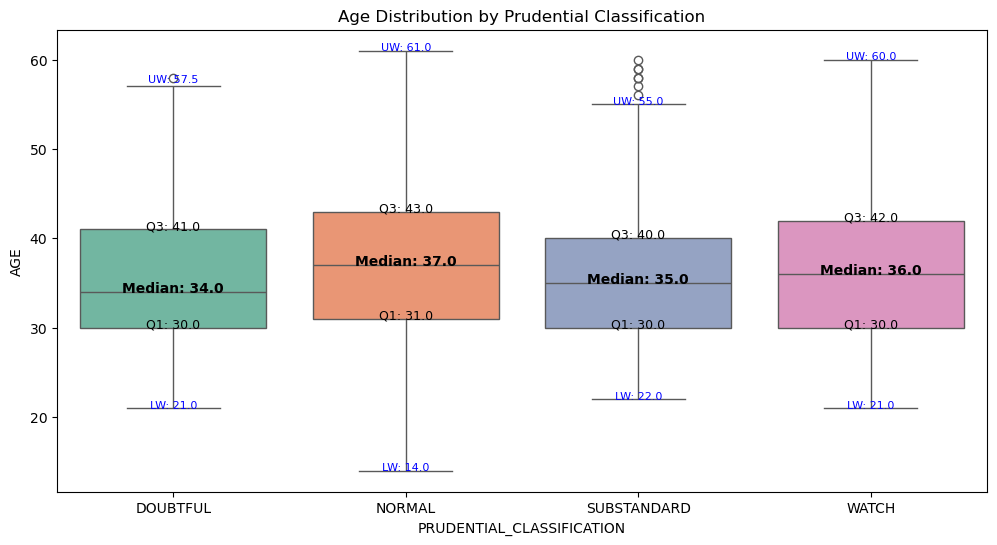

In [135]:
#Box plots
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_1_clean, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')

# Defining unique categories
categories = df_1_clean['PRUDENTIAL_CLASSIFICATION'].unique()

# Annotating statisctics for ease of readability
for i, category in enumerate(categories):
    subset = df_1_clean[df_1_clean['PRUDENTIAL_CLASSIFICATION'] == category]['AGE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values
    ax.text(i, median, f'Median: {median:.1f}', horizontalalignment='center', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')

# Titles and labels
plt.title("Age Distribution by Prudential Classification")
plt.xlabel("PRUDENTIAL_CLASSIFICATION")
plt.ylabel("AGE")

plt.show()



Relationship between number of defaulted loans and loan status

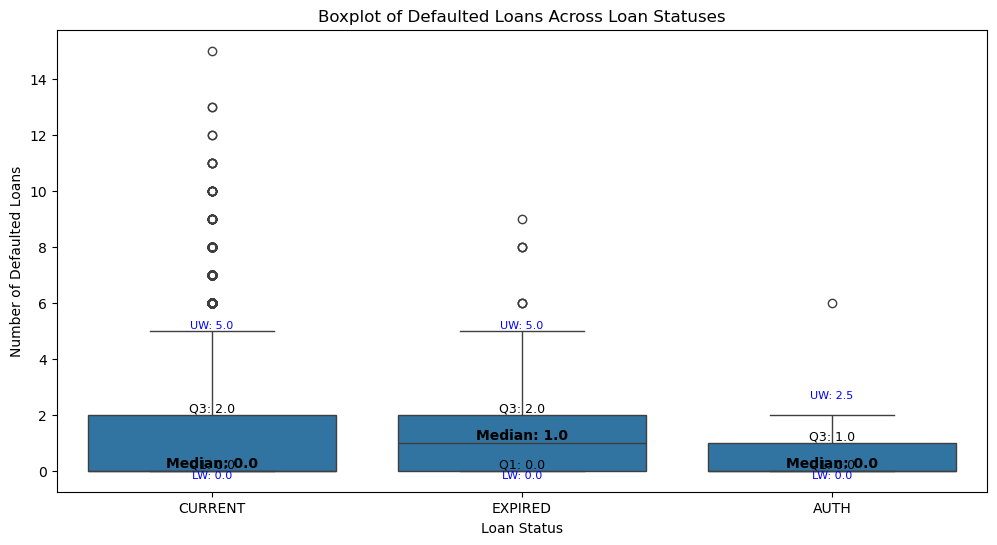

In [146]:
# Create figure and boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_1_clean, x='LOAN_STATUS', y='NO_DEFAULT_LOAN')

# Loop through categories to annotate statistics
categories = df_1_clean['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Correct subset selection
    subset = df_1_clean[df_1_clean['LOAN_STATUS'] == category]['NO_DEFAULT_LOAN']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Boxplot of Defaulted Loans Across Loan Statuses")
plt.xlabel("Loan Status")
plt.ylabel("Number of Defaulted Loans")
plt.show()


Relationships between Age, Credit Score and Loan Status

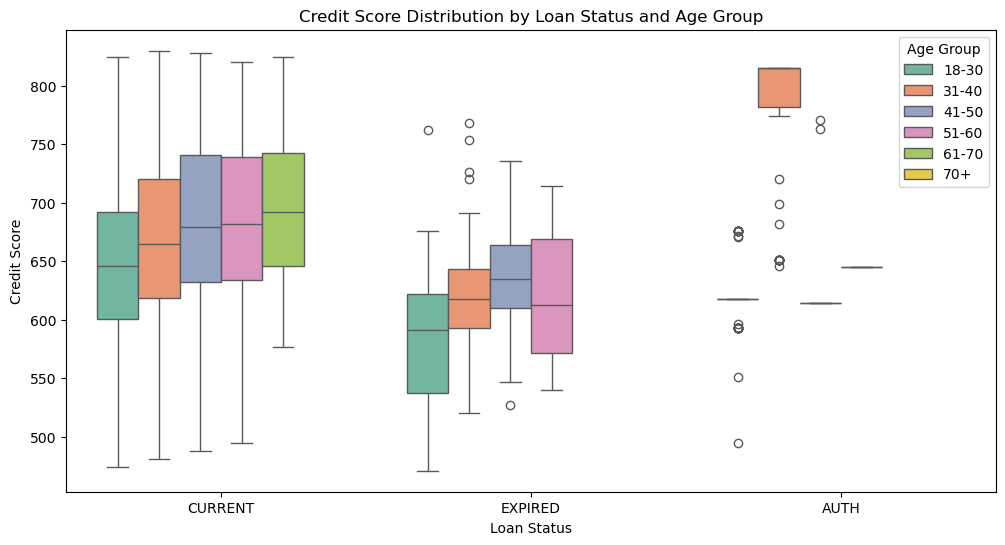

In [149]:
# Create Age Groups
df_1_clean['AGE_GROUP'] = pd.cut(df_1_clean['AGE'], bins=[18, 30, 40, 50, 60, 70, 100], 
                                 labels=["18-30", "31-40", "41-50", "51-60", "61-70", "70+"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1_clean, x='LOAN_STATUS', y='CREDIT_SCORE', hue='AGE_GROUP', palette='Set2')
plt.title("Credit Score Distribution by Loan Status and Age Group")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.legend(title="Age Group")
plt.show()


Relationship between marital status and prudential classification

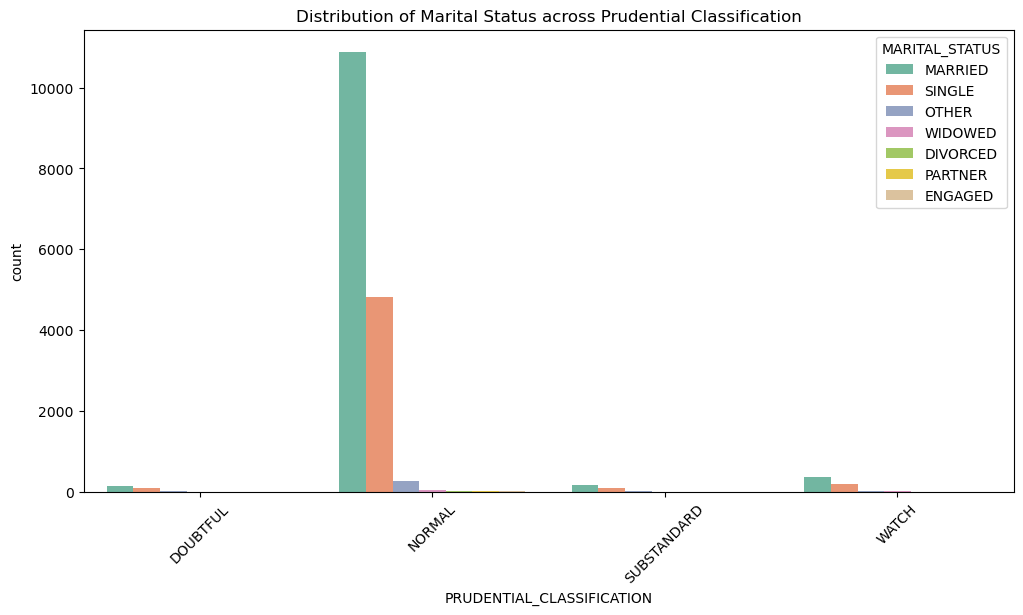

In [151]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PRUDENTIAL_CLASSIFICATION', hue='MARITAL_STATUS', data=df_1_clean, palette='Set2')
plt.title("Distribution of Marital Status across Prudential Classification")
plt.xticks(rotation=45)
plt.show()

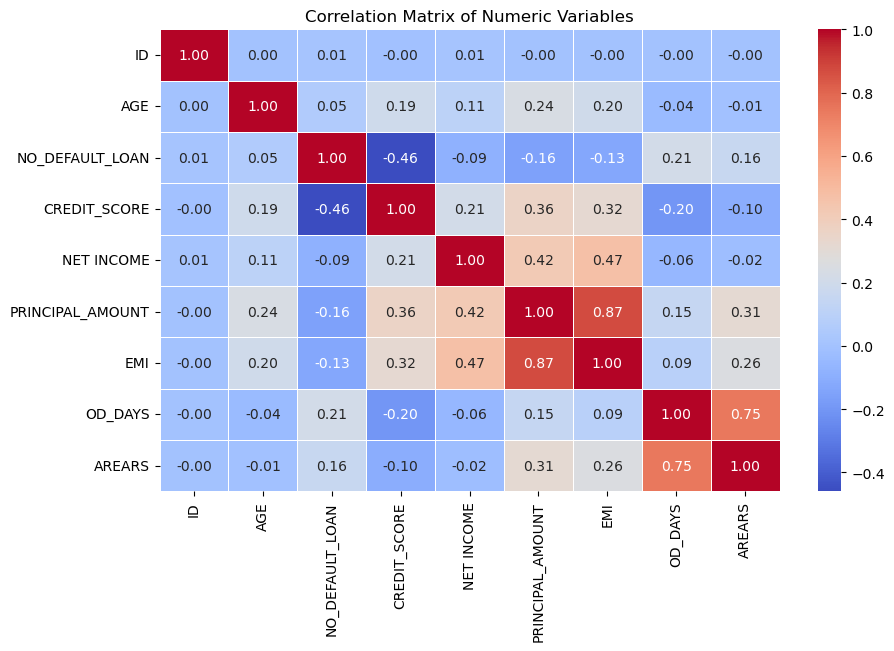

In [152]:
# Compute correlation matrix
numeric_df = df_1_clean.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numeric Variables")
plt.show()